# 1. Importing the libraries

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Importing the dataset

In [30]:
# Load the dataset
data = pd.read_csv('student-mat.csv', delimiter=';')

# Display the first few rows to ensure the data is split correctly
print(data.head())

  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]


In [31]:
# Display summary information
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [32]:
# Display summary statistics
print(data.describe())

              age        Medu        Fedu  traveltime   studytime    failures  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean    16.696203    2.749367    2.521519    1.448101    2.035443    0.334177   
std      1.276043    1.094735    1.088201    0.697505    0.839240    0.743651   
min     15.000000    0.000000    0.000000    1.000000    1.000000    0.000000   
25%     16.000000    2.000000    2.000000    1.000000    1.000000    0.000000   
50%     17.000000    3.000000    2.000000    1.000000    2.000000    0.000000   
75%     18.000000    4.000000    3.000000    2.000000    2.000000    0.000000   
max     22.000000    4.000000    4.000000    4.000000    4.000000    3.000000   

           famrel    freetime       goout        Dalc        Walc      health  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean     3.944304    3.235443    3.108861    1.481013    2.291139    3.554430   
std      0.896659    0.9988

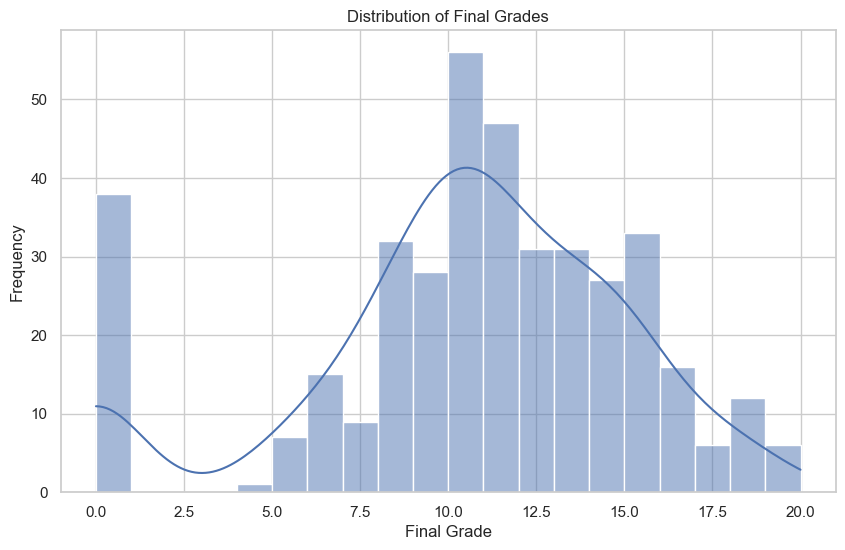

In [33]:
# Set the style for the plots
sns.set(style="whitegrid")

# Plot the distribution of final grades
plt.figure(figsize=(10, 6))
sns.histplot(data['G3'], bins=20, kde=True)
plt.title('Distribution of Final Grades')
plt.xlabel('Final Grade')
plt.ylabel('Frequency')
plt.show()

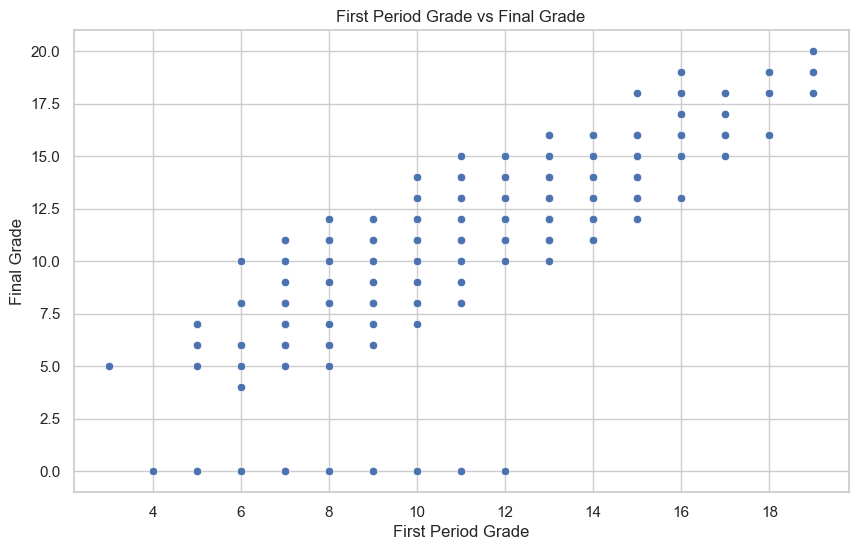

In [34]:
# Scatter plot of first period grade vs final grade
plt.figure(figsize=(10, 6))
sns.scatterplot(x='G1', y='G3', data=data)
plt.title('First Period Grade vs Final Grade')
plt.xlabel('First Period Grade')
plt.ylabel('Final Grade')
plt.show()

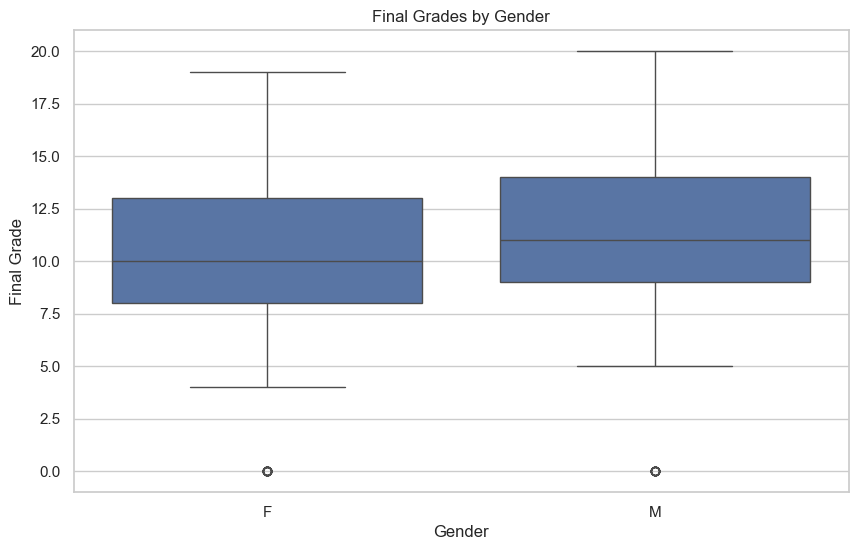

In [35]:
# Box plot of final grades by gender
plt.figure(figsize=(10, 6))
sns.boxplot(x='sex', y='G3', data=data)
plt.title('Final Grades by Gender')
plt.xlabel('Gender')
plt.ylabel('Final Grade')
plt.show()

In [36]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

ValueError: could not convert string to float: 'GP'

<Figure size 1200x800 with 0 Axes>